## Epicurious - Recipes with Rating and Nutrition Neural Network Classification with tensorflow.
<p> In this notebook there will be implemented a regression to classify or determine according to some features if there is a dessert or not</p>
<p>The dataset was taken from kaggle <a>https://www.kaggle.com/hugodarwood/epirecipes</a></p>

<h3>Welcome!!</h3>

Import main libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
print(tf.__version__)

2.6.0


Load the dataset

In [2]:
epicurious_df = pd.read_csv("epi_r.csv")
epicurious_df

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p>From the dataset will be taken four columns:
    <li>calories</li>	
    <li>protein</li>		
    <li>fat</li>		
    <li>sodium</li>	
 </p>

<p>Creating the new dataset</p>

In [396]:
epicurious_calories_sodium_df = epicurious_df[["calories","sodium","fat","dessert"]]
epicurious_calories_sodium_df.head()

,calories,sodium,fat,dessert
0,426.0,559.0,7.0,0.0
1,403.0,1439.0,23.0,0.0
2,165.0,165.0,7.0,0.0
3,NaN,NaN,NaN,0.0
4,547.0,452.0,32.0,0.0


Type of the data

In [214]:
epicurious_calories_sodium_df.dtypes

calories    float64
sodium      float64
fat         float64
dessert     float64
dtype: object

Find the NaN values in the dataset

In [397]:
epicurious_calories_sodium_df.isnull().sum()

calories    4117
sodium      4119
fat         4183
dessert        0
dtype: int64

The NaN data will be drop from the dataset 

In [398]:
epicurious_calories_sodium_df = epicurious_calories_sodium_df.dropna()
print(epicurious_calories_sodium_df.shape)
print(epicurious_calories_sodium_df.isnull().sum())
epicurious_calories_sodium_df.head()

(15867, 4)
calories    0
sodium      0
fat         0
dessert     0
dtype: int64


,calories,sodium,fat,dessert
0,426.0,559.0,7.0,0.0
1,403.0,1439.0,23.0,0.0
2,165.0,165.0,7.0,0.0
4,547.0,452.0,32.0,0.0
5,948.0,1042.0,79.0,0.0


Let's make some boxplots to have a representation of the data and check if there are any outliers

Text(0.5, 1.0, 'Calories')

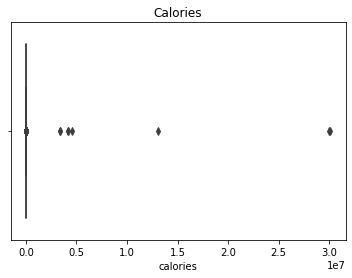

In [217]:
sns.boxplot(x=epicurious_calories_sodium_df.calories).set_title("Calories")

Text(0.5, 1.0, 'Sodium')

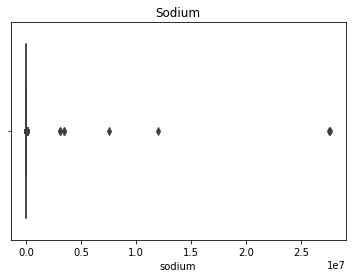

In [399]:
sns.boxplot(x=epicurious_calories_sodium_df.sodium).set_title("Sodium")

Text(0.5, 1.0, 'Fat')

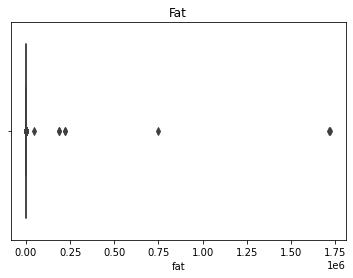

In [219]:
sns.boxplot(x=epicurious_calories_sodium_df.fat).set_title("Fat")

Text(0.5, 1.0, 'Dessert')

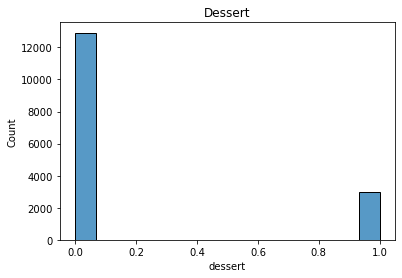

In [220]:
sns.histplot(x=epicurious_calories_sodium_df.dessert).set_title("Dessert")

According to the plots above, it will be removed data from calories and sodium, values over 10000.

In [416]:
epicurious_calories_sodium_df = epicurious_calories_sodium_df.loc[
                                                                  (epicurious_calories_sodium_df.calories<10000)&\
                                                                  (epicurious_calories_sodium_df.sodium<10000)]
epicurious_calories_sodium_df.isna().sum()

calories    0
sodium      0
fat         0
dessert     0
dtype: int64

Text(0.5, 1.0, 'Calories')

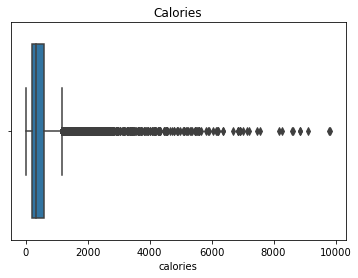

In [417]:
sns.boxplot(x=epicurious_calories_sodium_df.calories).set_title("Calories")

Text(0.5, 1.0, 'Sodium')

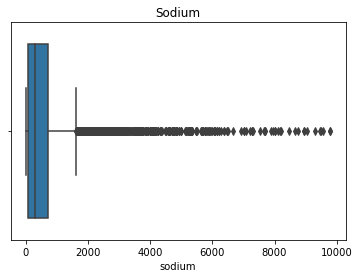

In [418]:
sns.boxplot(x=epicurious_calories_sodium_df.sodium).set_title("Sodium")

Text(0.5, 1.0, 'Fat')

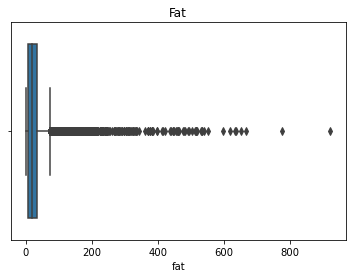

In [419]:
sns.boxplot(x=epicurious_calories_sodium_df.fat).set_title("Fat")

Text(0.5, 1.0, 'Dessert')

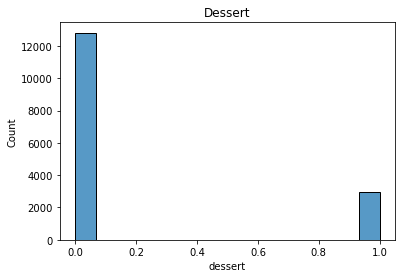

In [420]:
sns.histplot(x=epicurious_calories_sodium_df.dessert).set_title("Dessert")

<h3>Let's plot</h3>
making some plots between features to identify any relation.

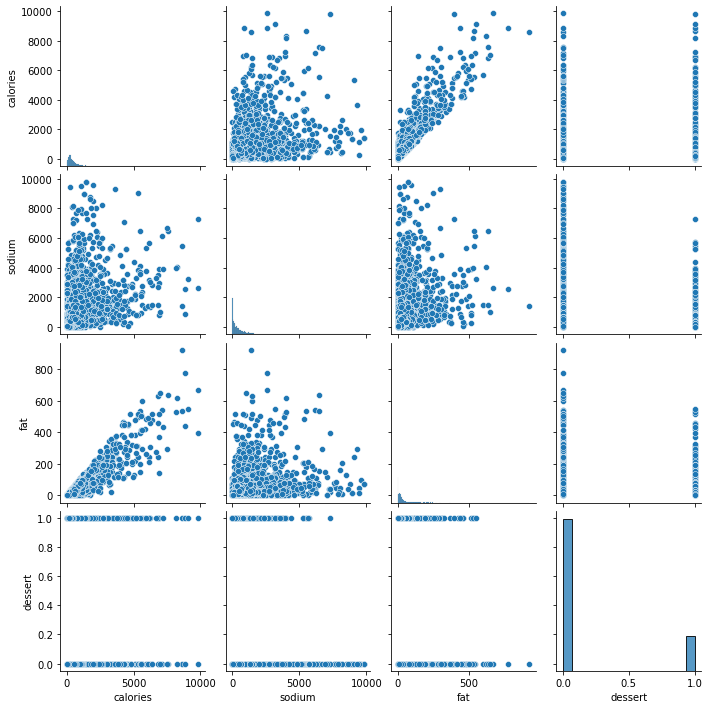

In [421]:
sns.pairplot(data=epicurious_calories_sodium_df)

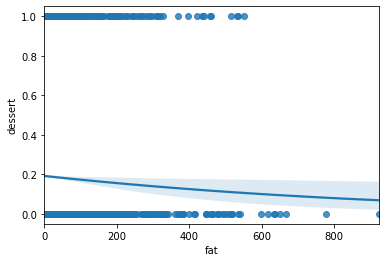

In [422]:
sns.regplot(x="fat",y="dessert",logistic=True, data=epicurious_calories_sodium_df)

In [423]:
epicurious_calories_sodium_df["dessert"] = epicurious_calories_sodium_df["dessert"].astype("int")

Choose the X and y data to train and test the model.

In [424]:
X = epicurious_calories_sodium_df.iloc[:,0:3]
y = epicurious_calories_sodium_df.iloc[:,3]
X.shape, y.shape

((15762, 3), (15762,))

It's time to split the data intro train and test

In [425]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((12609, 3), (12609,))

Rescale the data

In [426]:
scaler_x = MinMaxScaler()
scaler_x.fit(X_train)
X_train_scaler = scaler_x.transform(X_train)
X_test_scaler = scaler_x.transform(X_test)

The feature to predict is unbalanced, to deal with it will be calculated a weight for any class belongs to the feature dessert
and using them in the fit section to train the model.

In [430]:
#Number of ceros and ones values in the feature dessert
neg = (y_train==0).sum()
pos = (y_train>0).sum()

#Total of values in the feature dessert
total = len(y_train)

#Calculate the weigths
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
print(f'weigth for 0 : {weight_for_0}\nweigth for 1 : {weight_for_1}' )

weigth for 0 : 0.6158542541760281
weigth for 1 : 2.657883642495784


Creating a model

In [559]:
#Random_seed()
tf.random.set_seed(42)

#1. create a model
epicurious_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[3],activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
]) 

#2.model compile
epicurious_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(0.001),
                        metrics=["AUC"])


#3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/10))

#4.Fit the model
history = epicurious_model.fit(X_train_scaler,
                               y_train,
                               epochs=40,
                               class_weight= {0: weight_for_0, 1: weight_for_1},
                               callbacks=[lr_scheduler], verbose=0)

Model's summary

In [544]:
epicurious_model.summary()

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_240 (Dense)            (None, 10)                40        
_________________________________________________________________
dense_241 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_242 (Dense)            (None, 1)                 11        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


Create a dataset using the history of the model to plot and looking for the best learning rate parameter.

In [560]:
history_df = pd.DataFrame(history.history)
history_df

,loss,auc,lr
0,0.690664,0.649306,0.000100
1,0.687907,0.707948,0.000126
2,0.684048,0.732585,0.000158
3,0.676194,0.746218,0.000200
4,0.661607,0.754640,0.000251
5,0.641602,0.761541,0.000316
6,0.618652,0.767563,0.000398
7,0.594237,0.774561,0.000501
8,0.570245,0.781038,0.000631
9,0.549547,0.782730,0.000794


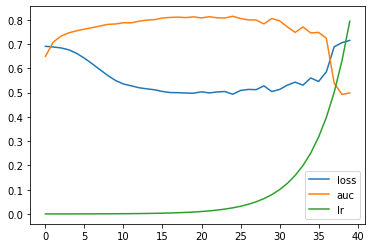

In [561]:
history_df.plot()

According to the plot above the optimal values were used in the range of 10 to 20 epochs, in our case was taken a learnig_rate : 0.003162

In [590]:
#Set random seed
tf.random.set_seed(42)

#1. Create the model
model_best_lr = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[3],activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#2. Compile the model
model_best_lr.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(0.003981),
                      metrics=["AUC"])

#3. Fit the model
model_best_lr.fit(X_train_scaler,
                  y_train,
                  epochs=40,
                  class_weight= {0: weight_for_0, 1: weight_for_1})

Epoch 1/40
395/395 [==============================] - 4s 5ms/step - loss: 0.6145 - auc: 0.7314
Epoch 2/40
395/395 [==============================] - 2s 4ms/step - loss: 0.5322 - auc: 0.7840A: 2s - loss:
Epoch 3/40
395/395 [==============================] - 1s 3ms/step - loss: 0.5186 - auc: 0.7942
Epoch 4/40
395/395 [==============================] - 1s 2ms/step - loss: 0.5137 - auc: 0.7983
Epoch 5/40
395/395 [==============================] - 1s 2ms/step - loss: 0.5071 - auc: 0.8056A: 0s - loss: 0.48
Epoch 6/40
395/395 [==============================] - 1s 2ms/step - loss: 0.5048 - auc: 0.8082
Epoch 7/40
395/395 [==============================] - 1s 2ms/step - loss: 0.4969 - auc: 0.8138
Epoch 8/40
395/395 [==============================] - 1s 2ms/step - loss: 0.4942 - auc: 0.8187
Epoch 9/40
395/395 [==============================] - 1s 2ms/step - loss: 0.4932 - auc: 0.8192
Epoch 10/40
395/395 [==============================] - 1s 2ms/step - loss: 0.4885 - auc: 0.8210
Epoch 11/40
395/39

The result generated from the model are in percentage, they will be become as ceros and ones using .round()

In [591]:
y_pred = model_best_lr.predict(X_test_scaler)
y_pred_class = tf.round(y_pred)

Evaluating the model with the test set to calculate the loss and the AUC

In [592]:
loss, AUC = model_best_lr.evaluate(X_test_scaler,y_test)
print(f'Calculating the loss : {loss}')
print(f'Calculating the AUC : {AUC}')

99/99 [==============================] - 1s 4ms/step - loss: 0.4519 - auc: 0.8438
Calculating the loss : 0.451941579580307
Calculating the AUC : 0.843817949295044


Obtain precision metric

In [593]:
p = tf.keras.metrics.Precision()
p.update_state(y_test,y_pred)
print(f'Calcualting precision : {p.result().numpy()}')

Calcualting precision : 0.378271222114563


Let's plot the confusion matrix

In [594]:
#Calculate the confison matrix using sklearn library
cm = confusion_matrix(y_test, y_pred_class)

true_values = cm.sum(axis=1)
cnt=0

#Normalizing the values of the confusion matrix
cm_norm = np.array([cm[s]/true_values[s] for s in range(0,cm.shape[0])])

#Select only two digit after the point in any value of the confusion matrix
cm_norm = np.array(["{0:0.2%}".format(value) for value in cm_norm.flatten()]).reshape(2,2)

Text(0.5, 15.0, 'Predict Label')

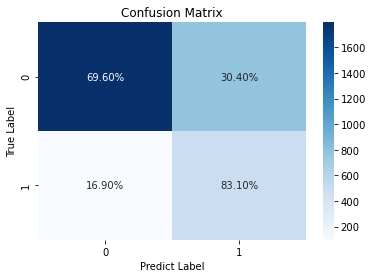

In [595]:
plot_cm = sns.heatmap(cm, annot=cm_norm, fmt='', cmap="Blues")
plot_cm.set_title("Confusion Matrix")
plot_cm.set_ylabel("True Label")
plot_cm.set_xlabel("Predict Label")
# group_count

<p>According to the confussion matrix our model could be rigth 83% of the time predicting a dessert when actually the sample is a dessert. Also, the model 
could be almsot right the 70% of the time predicting a sample is no a dessert when actually is not.</p>
<p>To train the model were selected only 3 features, sodium, fat and calories, to continue improving the model could be a good idea check the others features availables in the dataset and try to create other models.</p>
<h3>Thank!!</h3>